## 데이터프레임 합치기
- 두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 만든다.

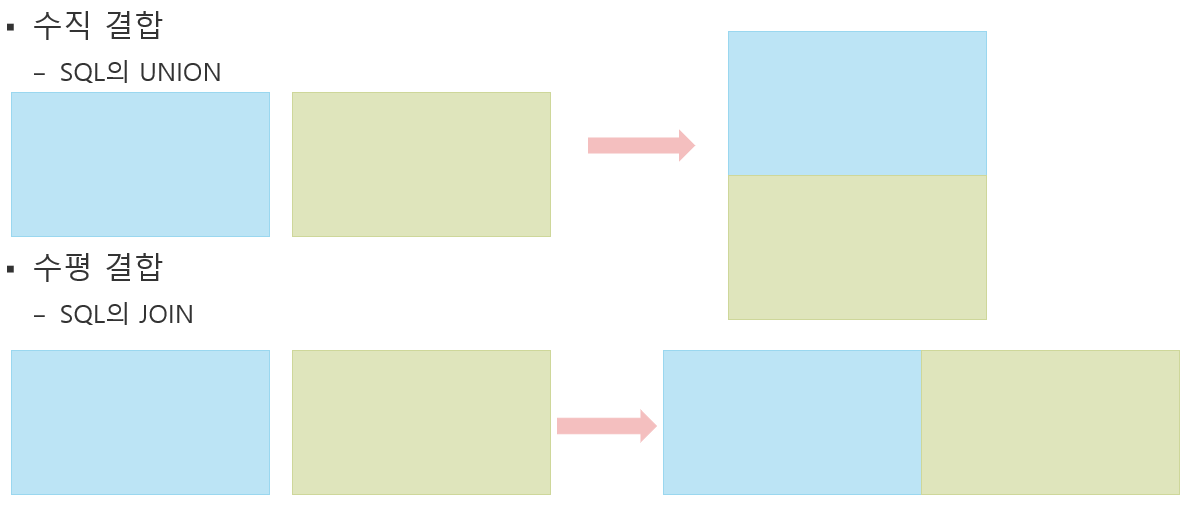

## 데이터셋 읽기
- stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
- stocks_info.csv : 주식 정보

In [3]:
import pandas as pd
import numpy as np

In [3]:
txt=[2016,2017,2018,'info']
s_2016,s_2017,s_2018,s_info=[pd.read_csv('data/stocks_{}.csv'.format(t)) for t in txt]

In [10]:
s_2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [11]:
s_2017

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [12]:
s_info

,Symbol,Name
0,AAPL,Apple Inc
1,TSLA,Tesla Inc
2,WMT,Walmart Inc
3,GE,General Electric
4,IBM,IBM(International Business Machines Co)
5,SLB,Schlumberger Limited.
6,TXN,Texas Instruments Incorporated
7,AMZN,"Amazon.com, Inc"


## concat() 이용
- 수직, 조인을 이용한 수평 결합 모두 지원한다.
- 수평결합의 경우 full outer join과 inner join을 지원한다.
    - full outer join이 기본 방식
    - 조인 기준: index가 같은 행 끼리 합친다. (equi-join)
- `pd.concat(objs,  [, key=리스트]), axis=0, join='outer')`
    - 매개변수
        - objs: 합칠 DataFrame들을 리스트로 전달
        - keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        - axis
            - 0 또는 index : 수직결합
            - 1 또는 columns : 수평결합
        - join: 
            - 조인방식
            - 'outer'(기본값) 또는 'inner'

> ### 조인(join)
> - 여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> - 두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> - Inner Join, Left Outer Join, Right Outer Join, Full Outer Join

In [13]:
# s_2016 ~ s_2017 수직결합(UNION ALL)
pd.concat([s_2016, s_2017, s_2018])

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [14]:
pd.concat([s_2016,s_2017,s_2018], ignore_index=True) # index는 합치지 않음

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
3,AAPL,50,120,140
4,GE,100,30,40
5,IBM,87,75,95
6,SLB,20,55,85
7,TXN,500,15,23
8,TSLA,100,100,300
9,AAPL,40,135,170


In [16]:
df=pd.concat([s_2016,s_2017,s_2018], keys=[2016,2017,2018])
df

Symbol  Shares  Low  High
2016 0   AAPL      80   95   110
     1   TSLA      50   80   130
     2    WMT      40   55    70
2017 0   AAPL      50  120   140
     1     GE     100   30    40
     2    IBM      87   75    95
     3    SLB      20   55    85
     4    TXN     500   15    23
     5   TSLA     100  100   300
2018 0   AAPL      40  135   170
     1   AMZN       8  900  1125
     2   TSLA      50  220   400

In [20]:
df.loc[2016,0]  # (multi-index) 2016의 index가 0인 행의 값 조회, column도 같은 방식으로

Symbol    AAPL
Shares      80
Low         95
High       110
Name: (2016, 0), dtype: object

In [22]:
# 조인 (수평방향으로 병합)
pd.concat([s_2016,s_2017,s_2018], axis=1)

,Symbol,Shares,Low,High,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140,AAPL,40.0,135.0,170.0
1,TSLA,50.0,80.0,130.0,GE,100,30,40,AMZN,8.0,900.0,1125.0
2,WMT,40.0,55.0,70.0,IBM,87,75,95,TSLA,50.0,220.0,400.0
3,NaN,NaN,NaN,NaN,SLB,20,55,85,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,TXN,500,15,23,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,TSLA,100,100,300,NaN,NaN,NaN,NaN


In [23]:
# 조인 기준: index, 방식: full outer join
pd.concat([s_2017,s_info], axis=1)

,Symbol,Shares,Low,High,Symbol,Name
0,AAPL,50.0,120.0,140.0,AAPL,Apple Inc
1,GE,100.0,30.0,40.0,TSLA,Tesla Inc
2,IBM,87.0,75.0,95.0,WMT,Walmart Inc
3,SLB,20.0,55.0,85.0,GE,General Electric
4,TXN,500.0,15.0,23.0,IBM,IBM(International Business Machines Co)
5,TSLA,100.0,100.0,300.0,SLB,Schlumberger Limited.
6,NaN,NaN,NaN,NaN,TXN,Texas Instruments Incorporated
7,NaN,NaN,NaN,NaN,AMZN,"Amazon.com, Inc"


In [28]:
pd.concat([s_2017.set_index('Symbol'), s_info.set_index('Symbol')],axis=1,join='inner')
# 공통된 index를 기준으로 inner join

,Shares,Low,High,Name
Symbol,,,,
AAPL,50,120,140,Apple Inc
GE,100,30,40,General Electric
IBM,87,75,95,IBM(International Business Machines Co)
SLB,20,55,85,Schlumberger Limited.
TXN,500,15,23,Texas Instruments Incorporated
TSLA,100,100,300,Tesla Inc


## 조인을 통한 DataFrame 합치기
- join()
    - 2개 이상의 DataFrame을 조인할 때 사용
- merge()
    - 2개의 DataFrame의 조인만 지원

### join()
- `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
- 두개 이상의 DataFrame들을 조인 할 수 있다.
    - **조인 기준**: index가 같은 값인 행끼리 합친다. (equi-join)
    - **조인 기본 방식**: Left Outer Join
- 매개변수
    - lsuffix, rsuffix 저
        - 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 발생.
        - 같은 이름이 있는 경우 붙일 접미어 지정
    - how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본
        

In [2]:
import pandas as pd
import numpy as np

In [8]:
s_2017

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [10]:
s_info

,Symbol,Name
0,AAPL,Apple Inc
1,TSLA,Tesla Inc
2,WMT,Walmart Inc
3,GE,General Electric
4,IBM,IBM(International Business Machines Co)
5,SLB,Schlumberger Limited.
6,TXN,Texas Instruments Incorporated
7,AMZN,"Amazon.com, Inc"


In [12]:
s_info.join(s_2017)  # Symbol 컬럼명 중복 오류

ValueError: columns overlap but no suffix specified: Index(['Symbol'], dtype='object')

In [13]:
s_info.join(s_2017, lsuffix='_info',rsuffix='_2017')

,Symbol_info,Name,Symbol_2017,Shares,Low,High
0,AAPL,Apple Inc,AAPL,50.0,120.0,140.0
1,TSLA,Tesla Inc,GE,100.0,30.0,40.0
2,WMT,Walmart Inc,IBM,87.0,75.0,95.0
3,GE,General Electric,SLB,20.0,55.0,85.0
4,IBM,IBM(International Business Machines Co),TXN,500.0,15.0,23.0
5,SLB,Schlumberger Limited.,TSLA,100.0,100.0,300.0
6,TXN,Texas Instruments Incorporated,NaN,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN


In [18]:
# symbol을 index로 변환 후 symbol을 기준으로 join
s_info.set_index('Symbol').join(s_2017.set_index('Symbol')) # left join

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50.0,120.0,140.0
TSLA,Tesla Inc,100.0,100.0,300.0
WMT,Walmart Inc,NaN,NaN,NaN
GE,General Electric,100.0,30.0,40.0
IBM,IBM(International Business Machines Co),87.0,75.0,95.0
SLB,Schlumberger Limited.,20.0,55.0,85.0
TXN,Texas Instruments Incorporated,500.0,15.0,23.0
AMZN,"Amazon.com, Inc",NaN,NaN,NaN


In [19]:
s_info.set_index('Symbol').join(s_2017.set_index('Symbol'), how='inner') # how='inner': inner join (일치하는 항목만 추출)

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50,120,140
TSLA,Tesla Inc,100,100,300
GE,General Electric,100,30,40
IBM,IBM(International Business Machines Co),87,75,95
SLB,Schlumberger Limited.,20,55,85
TXN,Texas Instruments Incorporated,500,15,23


In [21]:
s_info.set_index('Symbol').join(s_2017.set_index('Symbol'), how='outer') # how='outer': full oter join

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50.0,120.0,140.0
AMZN,"Amazon.com, Inc",NaN,NaN,NaN
GE,General Electric,100.0,30.0,40.0
IBM,IBM(International Business Machines Co),87.0,75.0,95.0
SLB,Schlumberger Limited.,20.0,55.0,85.0
TSLA,Tesla Inc,100.0,100.0,300.0
TXN,Texas Instruments Incorporated,500.0,15.0,23.0
WMT,Walmart Inc,NaN,NaN,NaN


In [22]:
s_2018.add_suffix('_2018')  # 모든 컬럼명 뒤에 접미어(_2018) 추가

,Symbol_2018,Shares_2018,Low_2018,High_2018
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [29]:
stocks=[s_2016.set_index('Symbol').add_suffix('_2016'),
s_2017.set_index('Symbol').add_suffix('_2017'),
s_2018.set_index('Symbol').add_suffix('_2018')]
stocks

[        Shares_2016  Low_2016  High_2016
 Symbol                                  
 AAPL             80        95        110
 TSLA             50        80        130
 WMT              40        55         70,
         Shares_2017  Low_2017  High_2017
 Symbol                                  
 AAPL             50       120        140
 GE              100        30         40
 IBM              87        75         95
 SLB              20        55         85
 TXN             500        15         23
 TSLA            100       100        300,
         Shares_2018  Low_2018  High_2018
 Symbol                                  
 AAPL             40       135        170
 AMZN              8       900       1125
 TSLA             50       220        400]

In [30]:
s_info.set_index('Symbol').join(stocks)

,Name,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,,
AAPL,Apple Inc,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,Tesla Inc,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,Walmart Inc,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,General Electric,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,IBM(International Business Machines Co),NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,Schlumberger Limited.,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,Texas Instruments Incorporated,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


### merge()
- `df_a.merge(df_b)`
- 두개의 DataFrame 조인만 지원
    - **조인 기준**: 같은 컬럼명을 기준으로 equi-join
    - **조인 기본 방식**: inner join
- 매개변수
    - on : 같은 컬럼명이 여러개일때 join 대상 컬럼을 선택
    - right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명. 
    - left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정 
    - how : 조인 방식.  'left', 'right', 'outer', 'inner'. 기본: inner 
    - suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        - 생략시 x, y를 붙인다.       

In [34]:
s_info.merge(s_2017)

,Symbol,Name,Shares,Low,High
0,AAPL,Apple Inc,50,120,140
1,TSLA,Tesla Inc,100,100,300
2,GE,General Electric,100,30,40
3,IBM,IBM(International Business Machines Co),87,75,95
4,SLB,Schlumberger Limited.,20,55,85
5,TXN,Texas Instruments Incorporated,500,15,23


In [36]:
s_info.merge(s_2017, how='left')

,Symbol,Name,Shares,Low,High
0,AAPL,Apple Inc,50.0,120.0,140.0
1,TSLA,Tesla Inc,100.0,100.0,300.0
2,WMT,Walmart Inc,NaN,NaN,NaN
3,GE,General Electric,100.0,30.0,40.0
4,IBM,IBM(International Business Machines Co),87.0,75.0,95.0
5,SLB,Schlumberger Limited.,20.0,55.0,85.0
6,TXN,Texas Instruments Incorporated,500.0,15.0,23.0
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN


In [37]:
s_info2=s_info.set_index('Symbol')
s_info2

,Name
Symbol,
AAPL,Apple Inc
TSLA,Tesla Inc
WMT,Walmart Inc
GE,General Electric
IBM,IBM(International Business Machines Co)
SLB,Schlumberger Limited.
TXN,Texas Instruments Incorporated
AMZN,"Amazon.com, Inc"


In [41]:
# left:s_info2 - Symbol: index, right:s_2017 - Symbol:컬럼
s_info2.merge(s_2017, left_index=True, right_on='Symbol') 

,Name,Symbol,Shares,Low,High
0,Apple Inc,AAPL,50,120,140
5,Tesla Inc,TSLA,100,100,300
1,General Electric,GE,100,30,40
2,IBM(International Business Machines Co),IBM,87,75,95
3,Schlumberger Limited.,SLB,20,55,85
4,Texas Instruments Incorporated,TXN,500,15,23


- 수직으로 합치는 경우 : concat() 사용
- 두개 **이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
- 두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편하다.

# TODO
 - customer.csv, order.csv, qna.csv를 DataFrame으로 조회
 - 확인

In [ ]:
# id를 기준으로 세개의 DataFrame을 join. - join()

In [ ]:
# customer와 order 두개의 DataFrame을 join - merge()

In [45]:
pd.read('customer.csv')

AttributeError: module 'pandas' has no attribute 'read'